In [88]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.collections import LineCollection
from matplotlib import cm
import shapefile
import matplotlib as mpl

List of countries with number of participants (fake example, should be read from data base).

In [106]:
countrylist = {'Belgium':2, 'France':6, 'Spain':8, 'United States':1, 
               'Egypt': 12, 'China': 1, 'Viet Nam': 6, 'Germany':10, 
              'Portugal':3}
nmax = float(max(countrylist.values()))

Prepare colormap

In [110]:
bounds = [0, 2, 4, 10, 20]
cmap = cm.BuGn
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

Read the shapefile

In [16]:
r = shapefile.Reader(r"/home/ctroupin/DataOceano/ShapeFiles/TM_WORLD_BORDERS_SIMPL-0.3/TM_WORLD_BORDERS_SIMPL-03")
shapes = r.shapes()
records = r.records()

In [27]:
for rec in records:
    countryname = rec[4]
    if countryname in countrylist.keys():
        print countryname

France
Belgium
Spain
United States


Prepare the projection

In [15]:
m = Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')

Make the plot

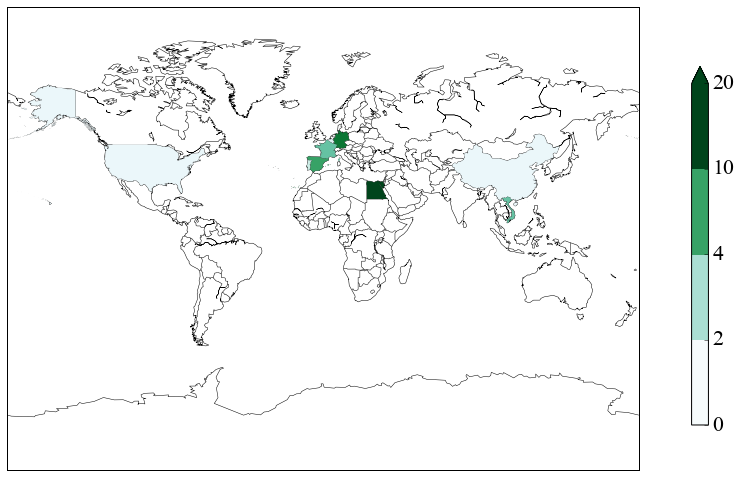

In [117]:
mpl.rcParams.update({'font.size': 22})
fig = plt.figure(figsize=(11.7,8.3))
ax = plt.subplot(111)
m.drawcountries(linewidth=0.5)
m.drawcoastlines(linewidth=0.5)

for record, shape in zip(records,shapes):
# Check if the country is the list
    countryname = record[4]
#    print countryname
    if countryname in countrylist:
        lons,lats = zip(*shape.points)
        data = np.array(m(lons, lats)).T
 
        if len(shape.parts) == 1:
            segs = [data,]
        else:
            segs = []
            for i in range(1,len(shape.parts)):
                index = shape.parts[i-1]
                index2 = shape.parts[i]
                segs.append(data[index:index2])
            segs.append(data[index2:])
 
        lines = LineCollection(segs,antialiaseds=(1,))
        lines.set_facecolors(cm.BuGn(countrylist[countryname]/nmax))
        lines.set_edgecolors('k')
        lines.set_linewidth(0.1)
        ax.add_collection(lines)
cax = fig.add_axes([0.95, 0.2, 0.02, 0.6])
cb1 = mpl.colorbar.ColorbarBase(cax, cmap=cm.BuGn,
                                norm=norm,
                                orientation='vertical', spacing='uniform',
                                extend='max')
# plt.savefig('tutorial10.png',dpi=300)
plt.show()